# 🔰==== In response to [this](https://stackoverflow.com/questions/72481620/what-is-coef-t-purpose-of-using-t) StackOverflow Question:

> Coef_ is used to find coefficients in linear equations in Python. But Coef_,<br>which I could not find the answer to, was put at the end of .T. What is the .T function here?

```
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
 lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
 print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
 C, lr_l1.score(X_train, y_train)))
 print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
 C, lr_l1.score(X_test, y_test)))
 plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
```




## Response: 

".T" means transpose and it switches rows & columns.

**coef_** has shape **(n_classes, n_features)** <br>
so **coef_.T** has shape **(n_features, n_classes)**

In [49]:
from sklearn.linear_model import LogisticRegression as LR
import numpy as np
import matplotlib.pyplot as plt

In [50]:
lrc = LR()

In [68]:
#==== make some toy data
x = np.array([np.random.random(3),np.random.random(3),np.random.random(3),np.random.random(3)])
y = np.array([1,2,3,4])
print(x.shape,y.shape)

(4, 3) (4,)


In [69]:
#=== Fit model:
lrc = lrc.fit(x,y)
print(lrc.coef_.shape)

(4, 3)


In [70]:
#=== Review a test case:
test = np.array([[4,5,6]])
lrc.predict(test)

array([3])

In [71]:
#===== Review Coefficients: 
lrc.coef_

array([[ 0.0318059 , -0.06998566,  0.25280005],
       [ 0.11151343, -0.26050253,  0.13055356],
       [ 0.11468283,  0.51394968, -0.05871893],
       [-0.25800216, -0.18346149, -0.32463468]])

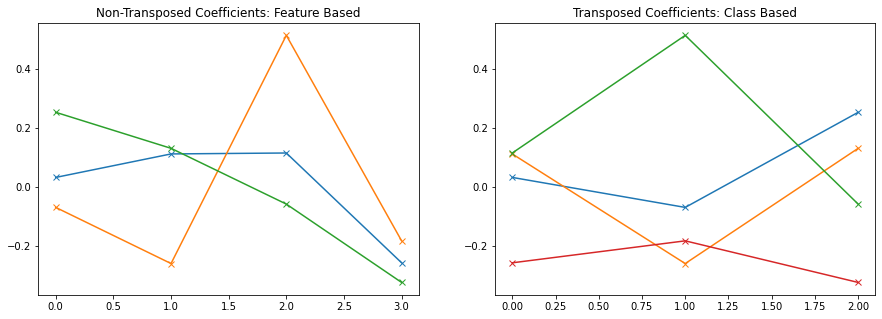

In [80]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(121)
_=ax.plot(lrc.coef_,marker='x')
_=ax.set_title('Non-Transposed Coefficients: Feature Based')
ax = plt.subplot(122)
_=ax.plot(lrc.coef_.T,marker='x')
_=ax.set_title('Transposed Coefficients: Class Based')